___

<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

---


# Проект по обработке и визуализации данных



## Обзор

___

Вы планируете посмотреть какой-то фильм. Можете ли Вы доверять онлайн-рейтингам и отзывам о фильмах? *Особенно* если та компания, которая занимается рейтингами и отзывами, *также* зарабатывает на продаже билетов на фильмы. Есть ли у таких компаний тенденция выдавать завышенные или заниженные рейтинги?

### Цель проекта:

**Цель проекта - по мотивам статьи на сайте fivethirtyeight.com [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) о рейтингах  определить, предоставляла ли компания Fandango завышенные рейтинги в 2015 году для того, чтобы продавать больше билетов...или нет.**

---

## Часть 1: Исследуем данные

**Данные**

----

Исходные данные для статьи [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) находятся в свободном доступе по следующей ссылке на github: https://github.com/fivethirtyeight/data. Это два csv-файла. В одном файле данные о рейтингах от компании Fandango, а в другом файле агрегированные данные о рейтингах от других компаний, таких как Metacritic, IMDB и Rotten Tomatoes.

----


----

**all_sites_scores.csv**

---


-----

Файл `all_sites_scores.csv` содержит все фильмы, для которых есть рейтинг Rotten Tomatoes, рейтинг RT User, оценка Metacritic, оценка Metacritic User и оценка IMDb, а также как минимум 30 отзывов от фанатов на Fandango. Данные Fandango были выгружены 24 августа 2015.

Колонка | Определение
--- | -----------
FILM | Название фильма
RottenTomatoes | Оценка "Rotten Tomatoes Tomatometer" для этого фильма
RottenTomatoes_User | Оценка "Rotten Tomatoes user" для этого фильма
Metacritic | Оценка "Metacritic" для этого фильма
Metacritic_User | Оценка "Metacritic user" для этого фильма
IMDB | Оценка "IMDb user" для этого фильма
Metacritic_user_vote_count | Количество голосов за этот фильм от пользователей Metacritic
IMDB_user_vote_count | Количество голосов за этот фильм от пользователей IMDb

----

**fandango_scape.csv**

---


Фильм `fandango_scrape.csv` содержит данные о фильмах, которые авторы статьи выгрузили с Fandango.

Колонка | Определение
--- | ---------
FILM | Название фильма
STARS | Количество звёзд на Fandango.com
RATING |  Рейтинг Fandango - значение, прочитанное с HTML-страницы. Это средний рейтинг фильма.
VOTES | Количество голосов пользователей, которые написали отзыв о фильме (на момент выгрузки данных).

----

**Импортируем библиотеки**

---


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Часть 2: Сравним рейтинг Stars Fandango и пользовательский рейтинг Rating

Сначала давайте изучим рейтинги Fandango и посмотрим, совпадут ли результаты нашего анализа с выводами в статье.


### 2.1: Загрузим файл fandango_scrape.csv

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

### 2.2.Изучим свойства полученного объекта DataFrame: выведем несколько первых строк и общую информацию

In [3]:
# Выведем первые 5 строк
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
# Изучим общую информацию о полученном объекте DataFrame
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
# Изучим числовые столбцы полученного объекта DataFrame
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


---

**Вывод:**

Оценки **fandango** имеют 504 фильма.

**!!!** Оценка **stars всегда равна или выше** оценки **rating**, так как stars рассчитывается из rating с округлением вверх.

---


### 2.3. Изучим связь между популярностью фильма (votes) и его рейтингом.

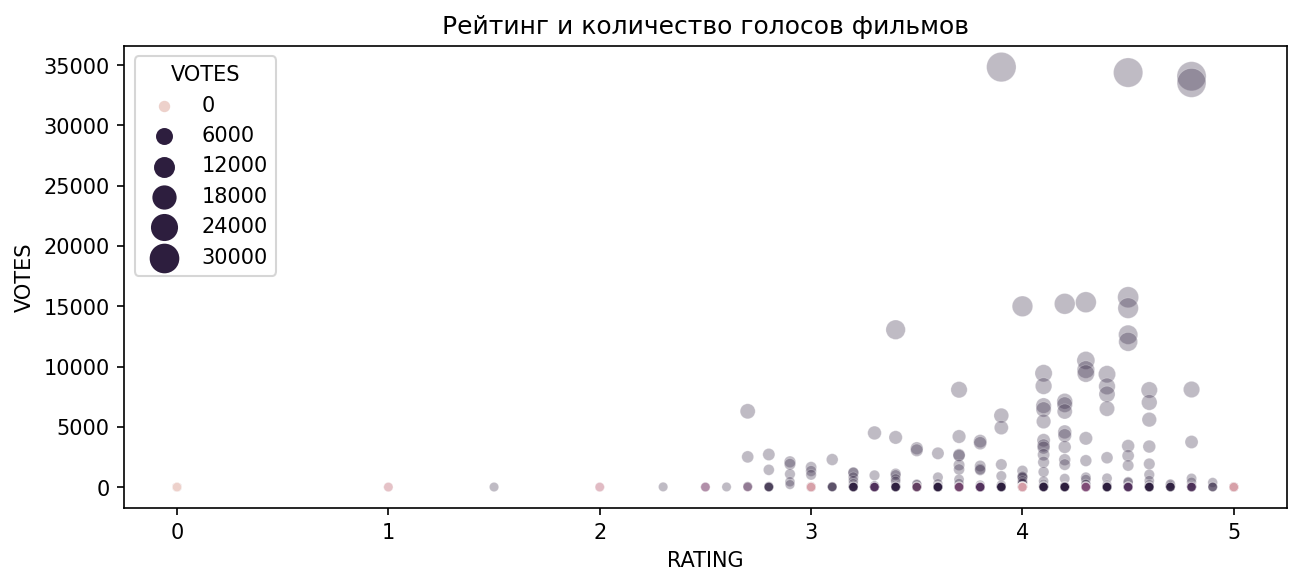

In [6]:
# Нарисуем график scatterplot, показывающий связь между колонками RATING и VOTES.
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(fandango, x = 'RATING', y = 'VOTES', alpha=0.3, color='darkblue', hue="VOTES", size="VOTES",sizes=(20, 200), hue_norm=(0, 5))
plt.title('Рейтинг и количество голосов фильмов');

In [7]:
#Вычислим корреляцию между колонками
fandango.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


---

**Вывод:**

Есть несколько фильмов с большим количеством голосов и высоким рейтингом, но их не много.

**!!!** В основном фильмы имеют небольшое количество голосов - до 5000. Четкой взаимосвязи между количеством голосов и рейтингом нет.

Высокая корреляция между rating и stars объясняется методикой расчета stars.

---

**Сделаем предположение, что каждая строка в колонке FILM содержит значение в следующем формате:**

    Название Фильма (Год)
  

In [8]:
# Создадим новую колонку YEAR, в ней возьмем из строки FILM только год
fandango['YEAR'] = fandango['FILM'].str[-5:-1]
# альтернативное решение
# fandango['YEAR'] = fandango['FILM'].apply(lambda x:x.split('(')[-1].replace(')', ''))
fandango['YEAR']

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
499    2015
500    2015
501    2015
502    1964
503    2012
Name: YEAR, Length: 504, dtype: object

In [9]:
# Найдем сколько фильмов содержится в наборе данных Fandango, в разбивке по годам
df1 = fandango.groupby('YEAR').agg({'FILM':'count'})
df1.columns = ['Counts']
df1 = df1.reset_index().sort_values(by='Counts', ascending=False)
df1

,YEAR,Counts
3,2015,478
2,2014,23
0,1964,1
1,2012,1
4,2016,1


In [10]:
#Альтернативное решение
#fandango['YEAR'].value_counts()

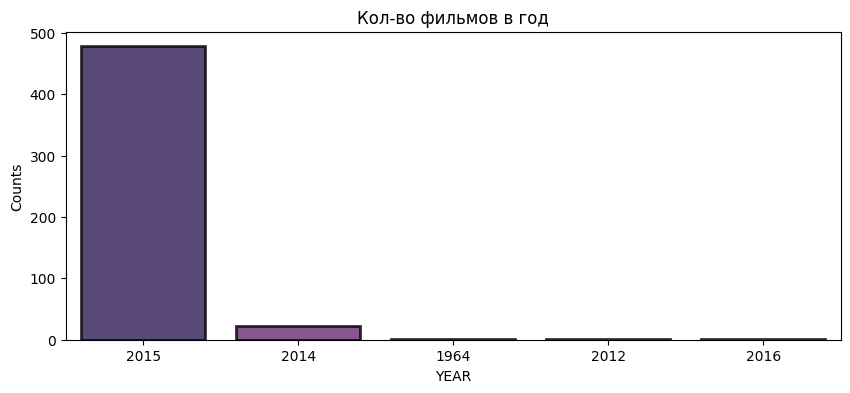

In [11]:
# Визуализируем количество фильмов в год
plt.figure(figsize=(10,4),dpi=100)
sns.barplot(df1, x='YEAR', y = 'Counts', edgecolor = 'black', linewidth = 2, palette='magma', alpha = .8)
plt.title('Кол-во фильмов в год');

In [12]:
#Альтернативное решение
#sns.countplot(data=fandango,x='YEAR')

### 2.4.Найдем 10 фильмов, получивших наибольшее количество голосов (votes)

In [13]:
# Найдем 10 фильмов, получивших наибольшее количество голосов (votes)
fandango.sort_values(by='VOTES', ascending=False).head(10)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [14]:
#Альтернативное решение
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


### 2.5.Найдем сколько фильмов имеет нулевое количество голосов (votes)

In [15]:
# Найдем сколько фильмов имеет нулевое количество голосов (votes)
fandango['VOTES'].value_counts()[0]

69

In [16]:
#Альтернативное решение 1
no_votes = fandango['VOTES']==0
no_votes.sum()

69

In [17]:
#Альтернативное решение 2
len(fandango[fandango['VOTES']==0])

69

In [18]:
# Создадим DataFrame с фильмами, которые имеют голоса (votes)
df2 = fandango[fandango['VOTES']>0]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 434
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    435 non-null    object 
 1   STARS   435 non-null    float64
 2   RATING  435 non-null    float64
 3   VOTES   435 non-null    int64  
 4   YEAR    435 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 20.4+ KB


----

**Из-за особенностей отображения рейтингов в виде звёзд на страницах HTML, истинные рейтинги пользователей могут немного отличаться от рейтингов, которые показываются пользователю. Давайте визуализируем эту разницу распределений.**
___


### 2.6.Изучим разницу между рейтингами STARS и истинными рейтингами на основе голосов пользователей RATING.

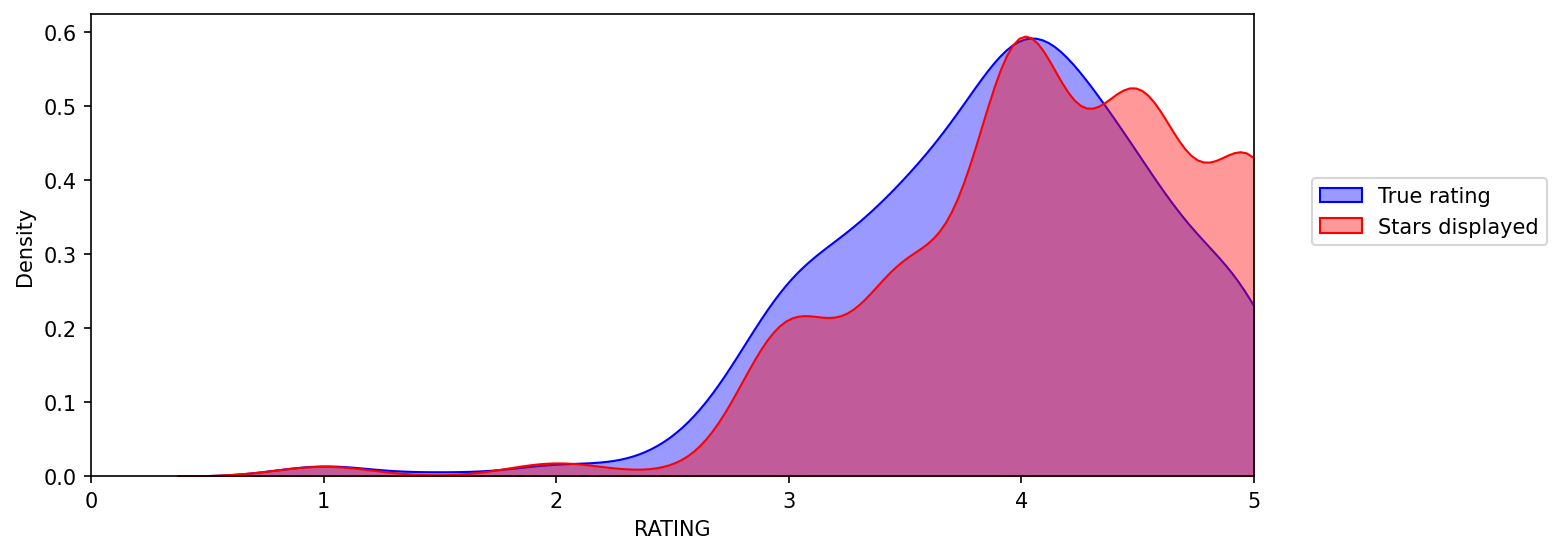

In [19]:
# Создадим график KDE plot, который отображает распределение отображаемых рейтингов (STARS)
# и истинных рейтингов на основе голосов пользователей (RATING)
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(
    data = df2, x = 'RATING',
   fill=True, color="blue",
   alpha=.4, linewidth=1, label = 'True rating'
    )
sns.kdeplot(
    data = df2, x = 'STARS',
   fill=True, color ="red",
   alpha=.4, linewidth=1, label = 'Stars displayed'
    )
plt.legend(loc=(1.05, 0.5))
plt.xlim((0,5))
plt.show()

In [20]:
#Альтернативное решение
#sns.kdeplot(data=df2,x='RATING',clip=[0,5],fill=True,label='True Rating')
#sns.kdeplot(data=df2,x='STARS',clip=[0,5],fill=True,label='Stars Displayed')

In [21]:
# Создадим новую колонку STARS_DIFF с разницей между колонками STARS и RATING
df2['STARS_DIFF'] = (df2['STARS'] - df2['RATING']).round(2)

<ipython-input-21-e462cbc11157>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['STARS_DIFF'] = (df2['STARS'] - df2['RATING']).round(2)


In [22]:
df2

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


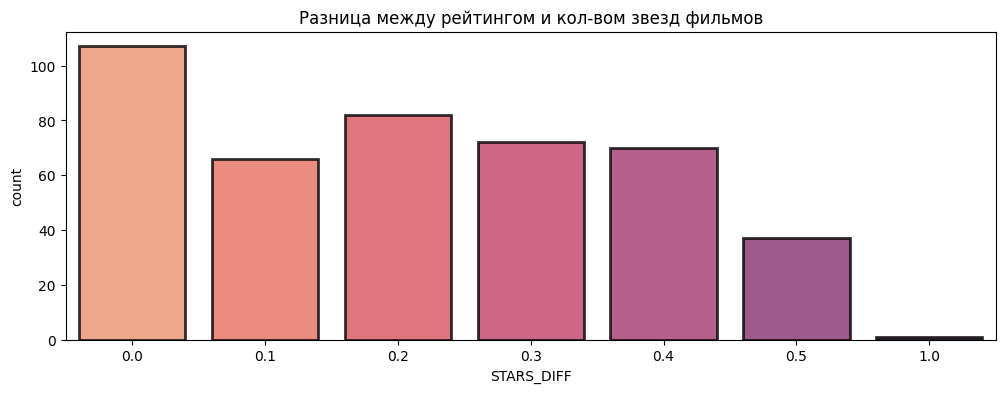

In [23]:
# Нарисуем график count plot для отображения сколько раз встречается то или иное значение
# разницы между STAR и RATING
plt.figure(figsize=(12, 4))
plt.title('Разница между рейтингом и кол-вом звезд фильмов')
sns.countplot(
    data=df2, x='STARS_DIFF',
    edgecolor = 'black', linewidth = 2,
    alpha=.8,
    palette='flare', saturation=2, fill=True,
    );

In [24]:
# Найдем фильм с разницей в 1 звезду между отображаемым рейтингом и истинным рейтингом
df2.loc[df2['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


---

**Вывод:**

Рейтинги rating и starts совпадают примерно у 100 фильмов (только 1/5 от общего кол-ва фильмов).

У большинства фильмов рейтинг starts выше rating.

**!!!** У фильма Turbo Kid (2015) рейтинг starts выше на целый балл. Чудеса округления!

Итого, значение рейтинга starts явно завышено в сравнении с реальным рейтингом rating, полученном от пользователей.

---

## Часть 3: Сравним рейтинги Fandango с рейтингами других компаний


### 3.1.Загрузим файл "all_sites_scores.csv и изучим общие свойства

In [25]:
# Загрузим файл "all_sites_scores.csv
all_sites = pd.read_csv("all_sites_scores.csv")

In [26]:
# Откроем первые 5 строк
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [27]:
# изучим общие свойства
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [28]:
# Изучим столбцы с числовыми данными
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


---

**Вывод:**

По другим компаниям у нас меньше данных о фильмах, имеющих рейтинги: 146 фильмов против 504 от Fandango (64 фильма Fandango имеют 0 рейтинг).

В отличии от Fandango у других компаний есть 2 типа рейтингов: рейтинг критиков и рейтинг пользователей.

**!!!** Рейтинг Fandango имеет шкалу от 0 до 5. Рейтинги других компаний имеют другую шкалу: либо от 0 до 10, либо от 0 до 100.

Далее проведем сравнительный анализ рейтингов пользователей и критиков в разрезе компаний и сравнительный анализ рейтингов Fandango и рейтингов других компаний.

Для сравнительного анализа рейтингов разных компаний будем использовать данные о 146 фильмах и нормализуем значения рейтингов.

---

### 3.2.Изучим связи между рейтингами от критиков и пользовательскими рейтингами других компаний (Rotten Tomatoes, Metacritic, IMDB)


#### 3.2.1. Rotten Tomatoes

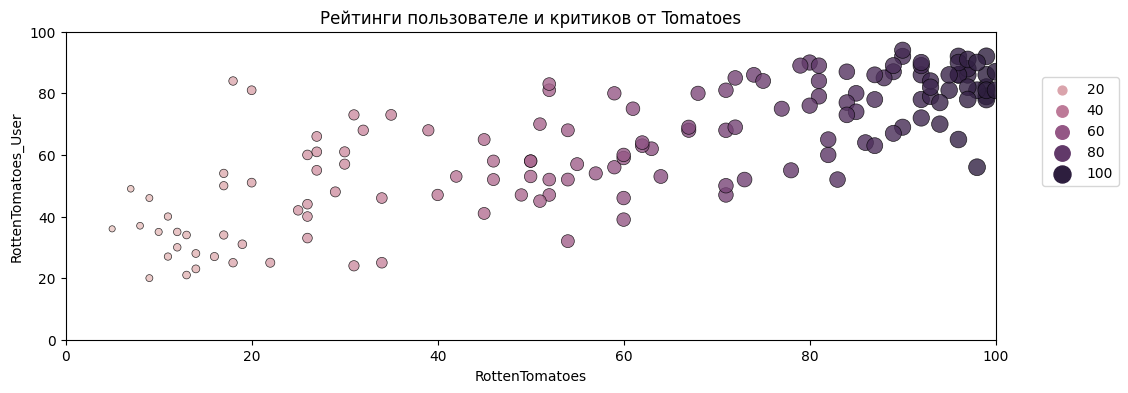

In [29]:
# Нарисуем график scatterplot, изображающий для Rotten Tomatoes связь между рейтингами от критиков и пользовательскими рейтингами
plt.figure(figsize=(12,4),dpi=100)
sns.scatterplot(all_sites, x = 'RottenTomatoes', y = 'RottenTomatoes_User', alpha=0.8, color='darkblue', hue="RottenTomatoes", size="RottenTomatoes",sizes=(20, 150), hue_norm=(0, 100), edgecolor = 'black', linewidth = 0.5)
plt.legend(loc=(1.05, 0.5))
plt.xlim((0,100))
plt.ylim((0,100))
plt.title('Рейтинги пользователе и критиков от Tomatoes');

Изучим численную разницу между этими двумя рейтингами. Посчитаем ее с помощью формулы RottenTomatoes-RottenTomatoes_User. Полученные значения Rotten_Diff - это рейтинг критиков минус рейтинг пользователей. Близкие к нулю значения говорят о том, что критики и пользователи согласны друг с другом. Большие положительные значения - когда критики оценили фильм намного выше, чем пользователи. А большие отрицательные значения - наоборот, пользователи оценили фильм намного выше, чем критики.

In [30]:
# Создадим колонку Rotten_Diff, в которой сохраним разницу между рейтингом от критиков и пользовательским рейтингом для Rotten Tomatoes.
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [31]:
# Изучим колонку Rotten_Diff
all_sites['Rotten_Diff'].describe()

count    146.000000
mean      -3.027397
std       19.156684
min      -66.000000
25%      -14.000000
50%        0.000000
75%       10.750000
max       42.000000
Name: Rotten_Diff, dtype: float64

Теперь давайте посчитаем среднее значение полученной разницы по всему набору данных. Поскольку разница может быть как положительной, так и отрицательной, то давайте сначала возьмём абсолютные величины всех значений, и только после этого посчитаем среднее значение. Таким образом мы получим среднее значение абсолютной разницы между рейтингами от критиков и пользовательскими рейтингами.

In [32]:
# Вычислим среднюю абсолютную разницу между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes
all_sites['Rotten_Diff'].abs().mean()

15.095890410958905

In [33]:
# Альтернативное решение
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

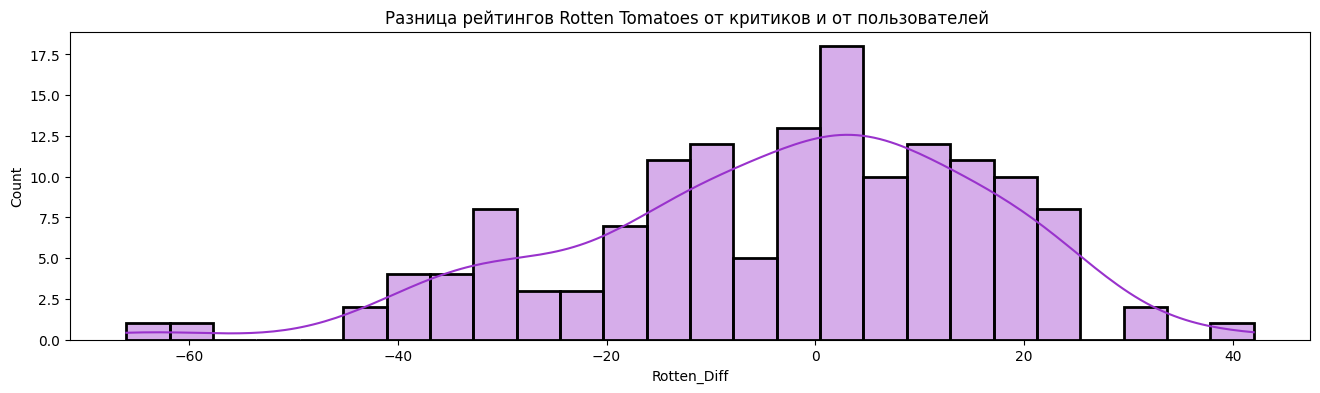

In [34]:
# Нарисуем график распределения разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes
plt.figure(figsize=(16, 4))
sns.histplot(
    data=all_sites, x='Rotten_Diff',
    edgecolor = 'black', linewidth = 2, bins = 26,
    alpha=.4, kde=True, color='darkorchid'
    )
plt.title('Разница рейтингов Rotten Tomatoes от критиков и от пользователей ');

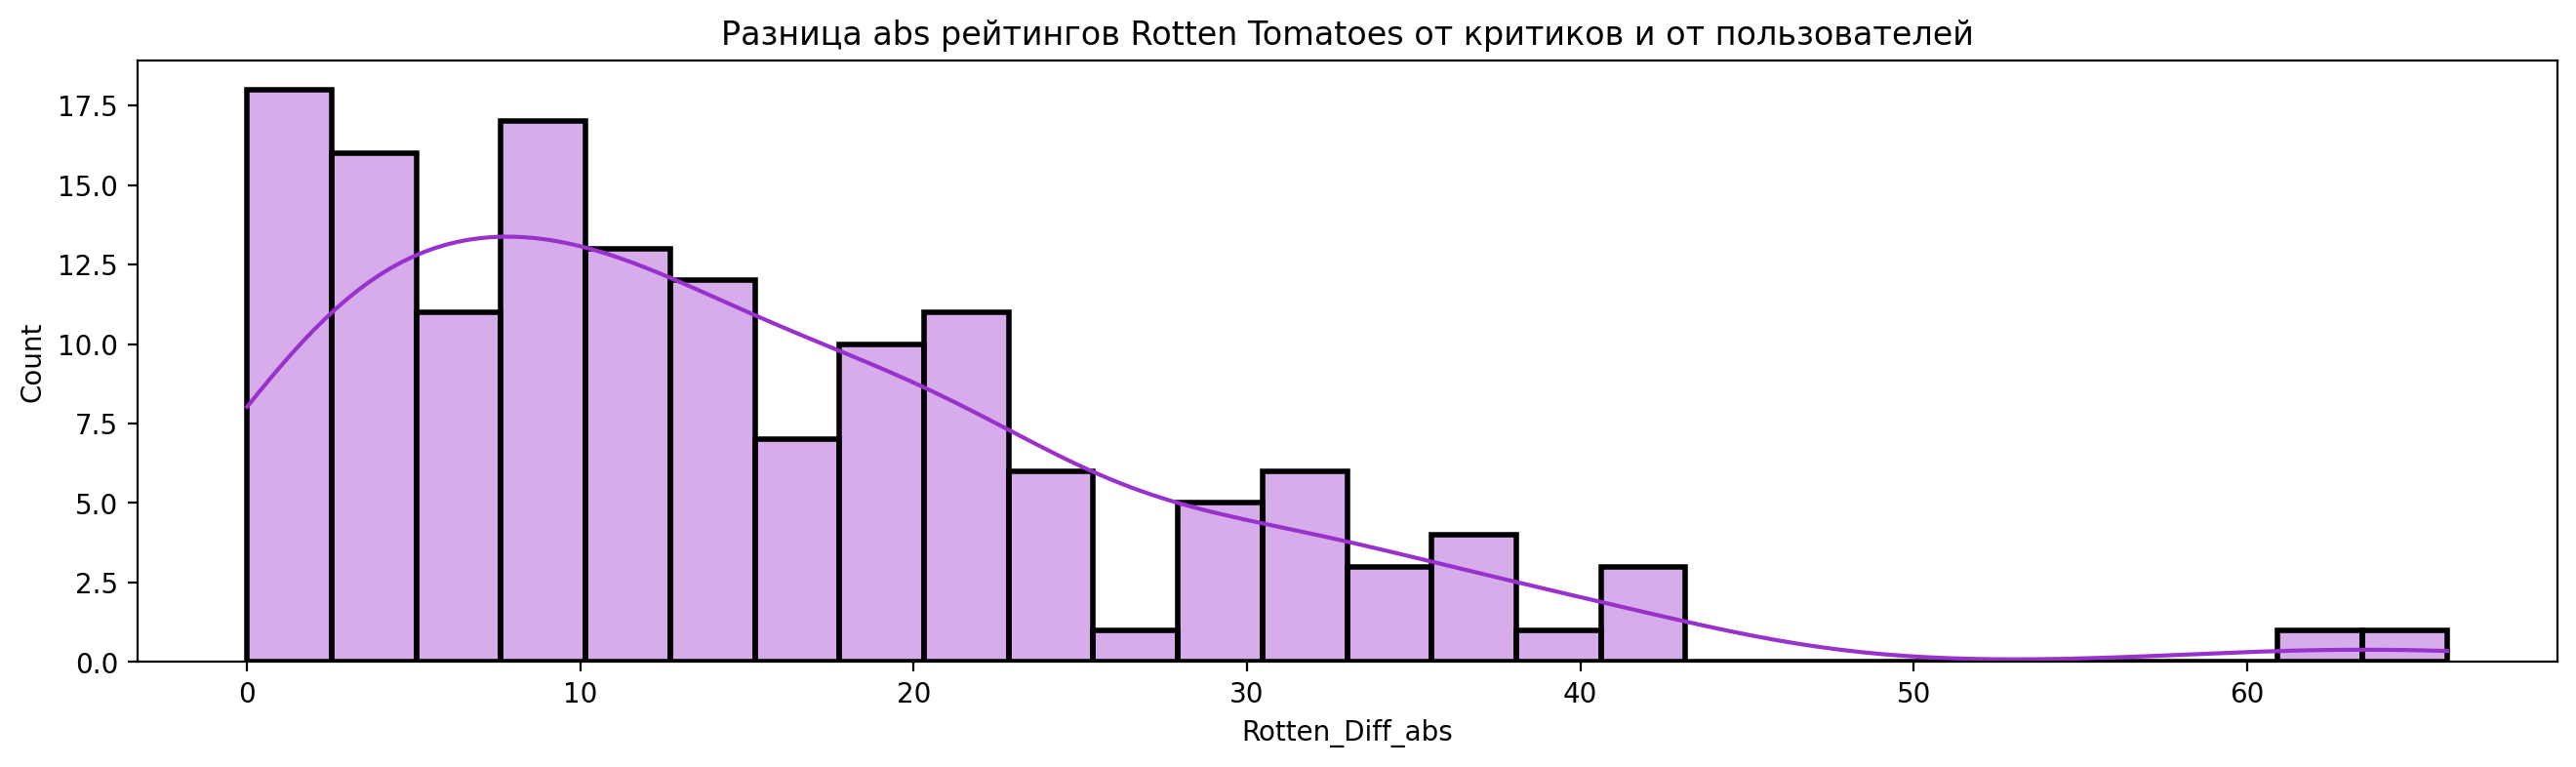

In [35]:
# Нарисуем график распределения абсолютных значений разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes
all_sites['Rotten_Diff_abs'] = all_sites['Rotten_Diff'].abs()
plt.figure(figsize=(16, 4), dpi=200)
sns.histplot(
    data=all_sites, x='Rotten_Diff_abs',
    edgecolor = 'black', linewidth = 2, bins = 26,
    alpha=.4, kde=True, color='darkorchid'
    )
plt.title('Разница abs рейтингов Rotten Tomatoes от критиков и от пользователей');

**Давайте выясним, какие фильмы наиболее отличаются по рейтингам. Сначала выведем 5 фильмов с наибольшей по модулю *отрицательной* разницей рейтингов. Поскольку мы вычисляли разницу рейтингов по формуле Critics Rating - Users Rating, большие по модулю отрицательные значения говорят о том, что пользователи в среднем оценили эти фильмы намного выше, чем критики.**

In [36]:
# Найдем 5 фильмов оцененные пользователями выше критиков
all_sites[['FILM', 'Rotten_Diff']].sort_values(by = 'Rotten_Diff').head()

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


In [37]:
# Альтернативное решение
all_sites.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [38]:
# Найдем 5 фильмов, которые были выше оценены критиками чем пользователями
all_sites[['FILM', 'Rotten_Diff']].sort_values(by = 'Rotten_Diff', ascending=False).head()

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


In [39]:
# Альтернативное решение
all_sites.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


---

Далее давайте быстро взглянем на рейтинги от MetaCritic. Они тоже отображают два типа рейтингов - как свои официальные рейтинги, так и пользовательские рейтинги.

---

#### 3.2.2.Metacritic

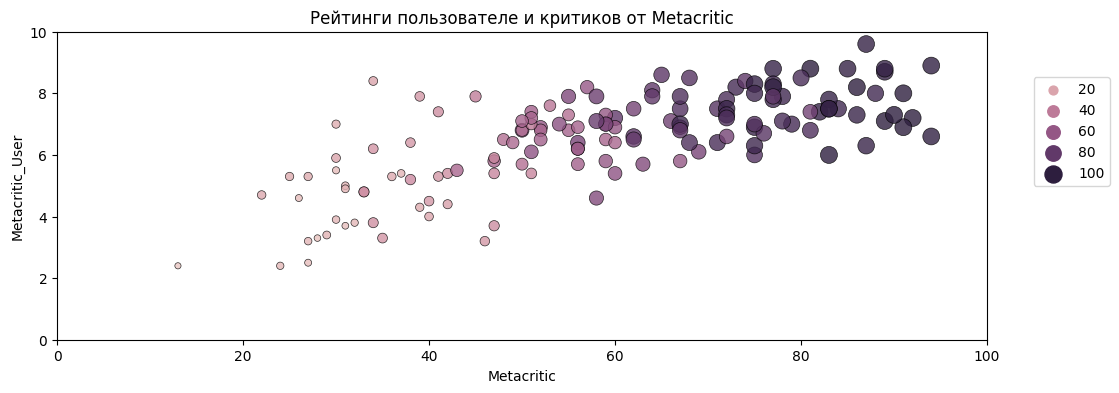

In [40]:
# Нарисуем график scatterplot для сравнения рейтингов Metacritic и Metacritic User
plt.figure(figsize=(12,4),dpi=100)
sns.scatterplot(all_sites, x = 'Metacritic', y = 'Metacritic_User', alpha=0.8, color='darkblue', hue="RottenTomatoes", size="RottenTomatoes",sizes=(20, 150), hue_norm=(0, 100), edgecolor = 'black', linewidth = 0.5)
plt.legend(loc=(1.05, 0.5))
plt.xlim((0,100))
plt.ylim((0,10))
plt.title('Рейтинги пользователе и критиков от Metacritic');

---

И наконец, посмотрим на рейтинги от IMDB. Обратите внимание, что Metacritic и IMDB показывают количество голосов. Посмотрим на наиболее популярные фильмы.

---

#### 3.2.3.IMDB

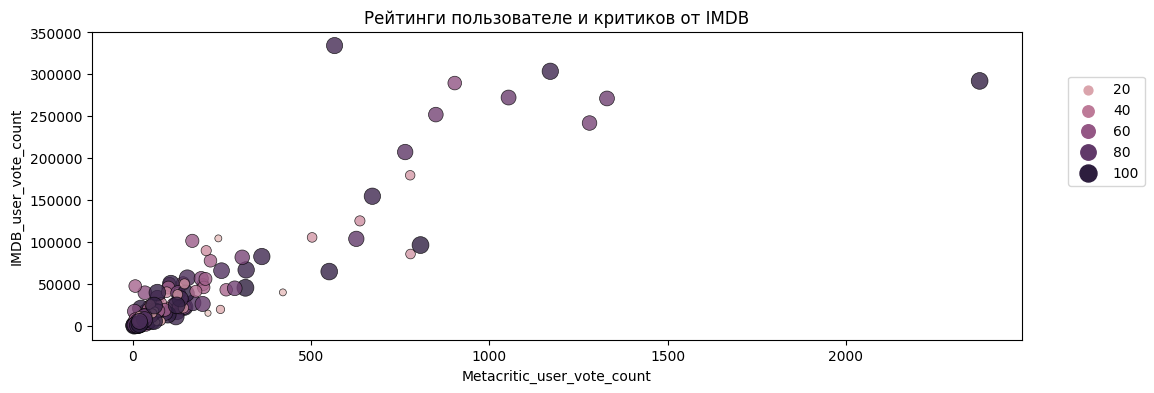

In [41]:
# Нарисуем график scatterplot для изображения связи между количеством голосов на MetaCritic
# и количеством голосов на IMDB
plt.figure(figsize=(12,4),dpi=100)
sns.scatterplot(all_sites, x = 'Metacritic_user_vote_count', y = 'IMDB_user_vote_count', alpha=0.8, color='darkblue', hue="RottenTomatoes", size="RottenTomatoes",sizes=(20, 150), hue_norm=(0, 100), edgecolor = 'black', linewidth = 0.5)
plt.legend(loc=(1.05, 0.5))
plt.title('Рейтинги пользователе и критиков от IMDB');

---

**Здесь мы видим два "выброса" - точки, очень сильно отличающиеся от всех других точек. Один фильм получил наибольшее количество голосов на IMDB, но только 500 голосов на Metacritic. Что это за фильм?**

---



In [42]:
# Найдем фильм, получивший наибольшее количество голосов на IMDB
all_sites.loc[all_sites['IMDB_user_vote_count']==all_sites['IMDB_user_vote_count'].max()]
#Альтернативное решение
#all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Rotten_Diff_abs
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2,2


In [43]:
# Найдем фильм, получивший наибольшее количество голосов на Metacritic
all_sites.loc[all_sites['Metacritic_user_vote_count']==all_sites['Metacritic_user_vote_count'].max()]
#Альтернативное решение
#all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Rotten_Diff_abs
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9,9


___

Давайте наконец выясним, являлись ли рейтинги Fandango искусственно завышенными, чтобы продавать больше билетов.

___


### 3.3.Объединим таблицу fandango с таблицей all_sites

---

**Не каждый фильм в таблице Fandango найдётся в таблице all_sites, потому что некоторые фильмы Fandango имеют очень мало отзывов или вообще не имеют отзывов. Но мы хотим сравнивать только те фильмы, которые есть в обеих таблицах. Поэтому сделайте объединение "*inner* merge" двух наборов данных, сопоставляя строки по колонке FILM.**

---


In [44]:
# Объединим таблицу fandango с таблицей all_sites
df3 = fandango.merge(all_sites, on = 'FILM', how='inner')

In [45]:
# Изучим полученный объект DataFrame
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
 13  Rotten_Diff_abs             145 non

In [46]:
# Откроем первые 5 строк
df3.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Rotten_Diff_abs
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,8


### 3.4. Нормализуем значения рейтингов разных компаний и проведем их сравнительный анализ

Компании Rotten Tomatoes, Metacritic и IMDB используют другую шкалу измерения рейтингов, чем шкала от 0 до 5 звезд в Fandango. Чтобы выполнить сравнения, нам нужно *нормализовать* эти значения, чтобы они попадали с диапазон от 0 до 5 звёзд.

Есть много способов сделать это:

https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

самый простой способ конвертации рейтингов:
* 100/20 = 5
* 10/2 = 5

In [47]:
# Создадим дополнительные колонки в df3, и запишем в них нормализованные значения рейтингов
# от 0 до 5 (RottenTomatoes)
df3['RT_Norm'] = round(df3['RottenTomatoes']/20, 1)
df3['RTU_Norm'] = round(df3['RottenTomatoes_User']/20, 1)

In [48]:
# Создадим дополнительные колонки в df3, и запишем в них нормализованные значения рейтингов
# от 0 до 5 (Metacritic)
df3['Meta_Norm'] = round(df3['Metacritic']/20, 1)
df3['Meta_U_Norm'] = round(df3['Metacritic_User']/2, 1)

In [49]:
# Создадим дополнительные колонки в df3, и запишем в них нормализованные значения рейтингов
# от 0 до 5 (IMDB)
df3['IMDB_Norm'] = round(df3['IMDB']/2, 1)
df3.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Rotten_Diff_abs,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,8,4.9,4.5,4.7,4.4,4.3


In [50]:
# Создадим DataFrame с названием norm_scores, в котором будут только нормализованные рейтинги и колонки STARS и RATING из таблицы fandango
norm_scores = df3[['STARS',	'RATING',	'RT_Norm',	'RTU_Norm',	'Meta_Norm',	'Meta_U_Norm',	'IMDB_Norm']].copy()

In [51]:
# Изучим полученный объект DataFrame
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3



---

А теперь момент истины! Действильно ли Fandango показывал неоправданно высокие рейтинги? Мы уже знаем, что отображаемые значения RATING были выше значений STARS. Но являются ли сами рейтинги в среднем более высокими, чем у других компаний?

---

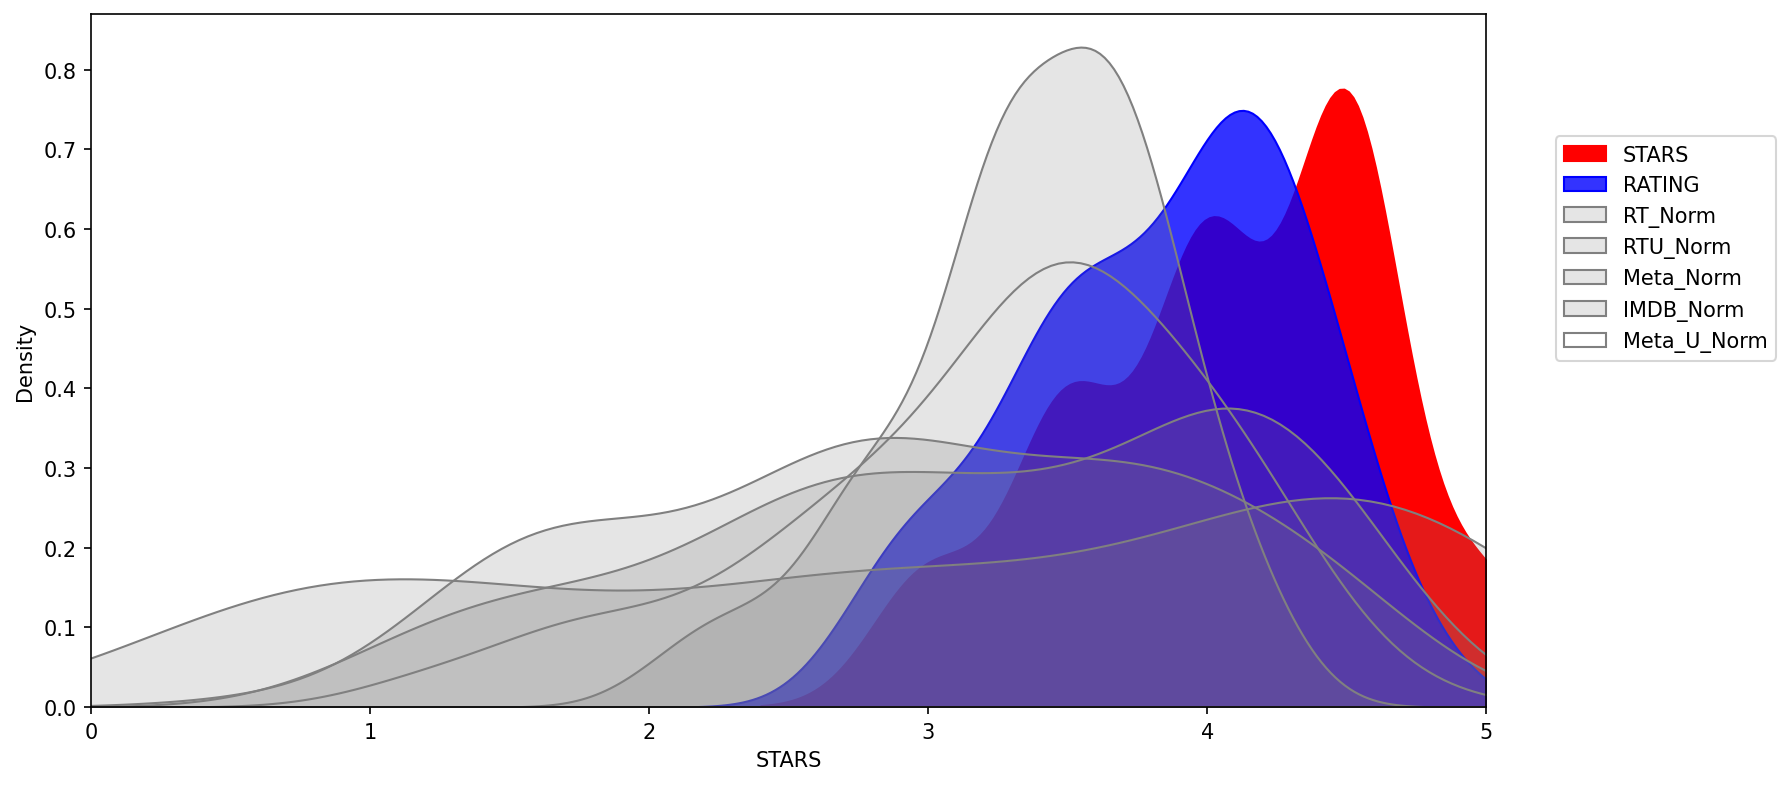

In [52]:
# Нарисуем график, сравнивающий распределения нормализованных рейтингов от всех компаний.
b3 = ['red', 'blue', 'grey', 'grey', 'grey', 'grey', 'grey']
alf = [1, 0.8, 0.2, 0.2, 0.2, 0.2, 0,2]
a3 = ['STARS',
 'RATING',
 'RT_Norm',
 'RTU_Norm',
 'Meta_Norm',
 'IMDB_Norm',
 'Meta_U_Norm',]
plt.subplots(figsize=(12,6),dpi=150)
for i in range(len(a3)):
    sns.kdeplot(
    data = norm_scores, x = a3[i],
    fill=True, color=b3[i],
    alpha=alf[i], linewidth=1, label = a3[i]
    )
plt.legend(loc=(1.05, 0.5))
plt.xlim((0,5))
plt.show()

In [53]:
'''
Альтернативный код
https://github.com/mwaskom/seaborn/issues/2280
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")
'''

'\nАльтернативный код\nhttps://github.com/mwaskom/seaborn/issues/2280\ndef move_legend(ax, new_loc, **kws):\n    old_legend = ax.legend_\n    handles = old_legend.legendHandles\n    labels = [t.get_text() for t in old_legend.get_texts()]\n    title = old_legend.get_title().get_text()\n    ax.legend(handles, labels, loc=new_loc, title=title, **kws)\nfig, ax = plt.subplots(figsize=(15,6),dpi=150)\nsns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette=\'Set1\',ax=ax)\nmove_legend(ax, "upper left")\n'

---

**Мы сразу видим, что рейтинги Fandango очень сдвинуты справо. Интересно также, что рейтинги RT от критиков имеют очень пологое распределение. Давайте сравним только эти два распределения.**

---


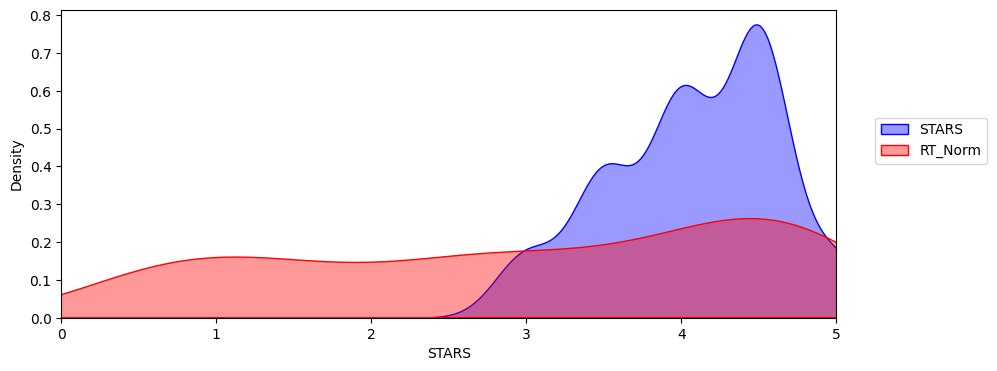

In [54]:
# Нарисуем график KDE plot, сравнивающий распределение рейтингов Rotten Tomatoes
# от критиков и распределение рейтингов STARS от Fandango
plt.figure(figsize=(10,4))
a2 = ['STARS',	'RT_Norm']
b2 = ['blue', 'red']
for i in range(len(a2)):
    sns.kdeplot(
    data = norm_scores, x = a2[i],
    fill=True, color=b2[i],
    alpha=.4, linewidth=1, label = a2[i]
    )
plt.legend(loc=(1.05, 0.5))
plt.xlim((0,5))
plt.show()


---

Обратим внимание на отличия в рейтингах между разными компаниями. Фильмы с высокими рейтингами должны попадать в одни кластеры, а фильмы с низкими рейтингами в другие кластеры.

---


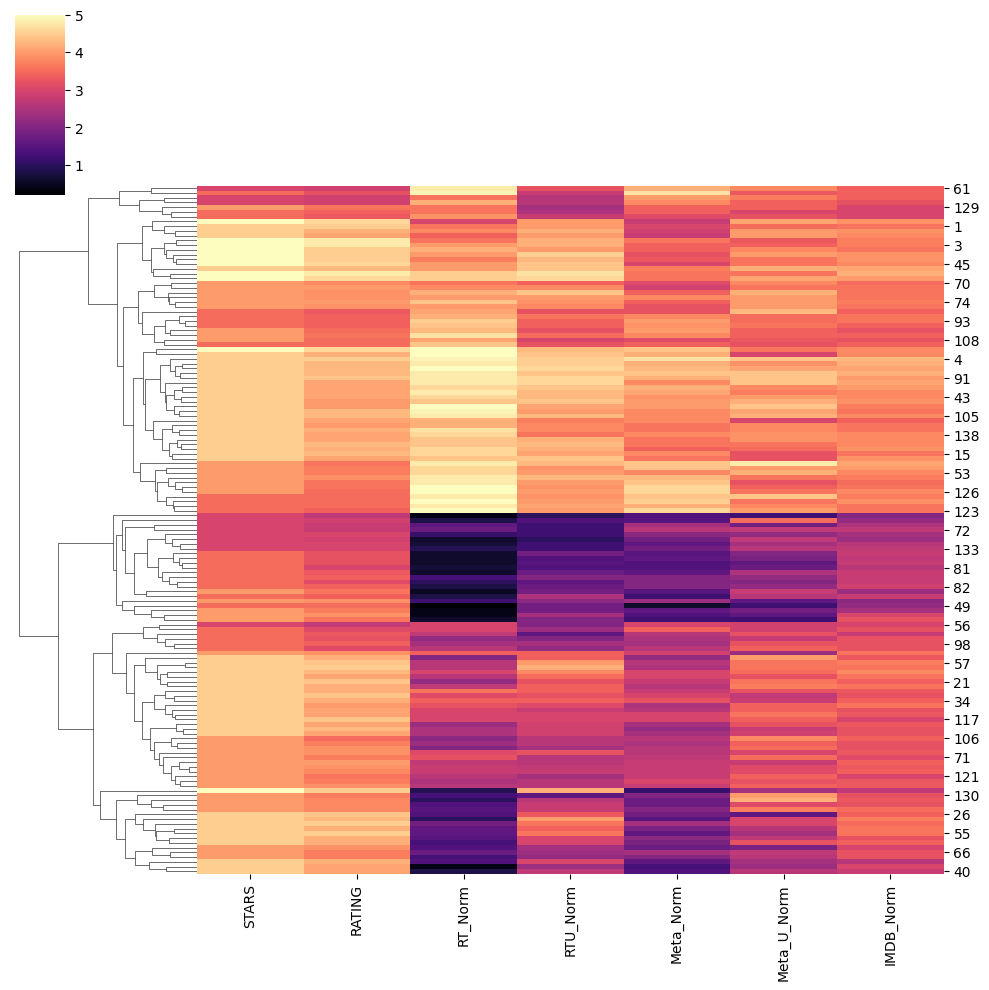

In [55]:
# Нарисуем график clustermap для всех нормализованных рейтингов.
sns.clustermap(norm_scores,cmap='magma',col_cluster=False)

---
Мы видим, что рейтинги Fandango явно выше рейтингов других компаний, особенно если смотреть на округлённые вверх значения рейтингов.

---


In [56]:
# Посмотрим на 10 фильмов с наихудшими рейтингами по версии Rotten Tomatoes Critic
# и какие нормализованные рейтинги дали этим фильмам другие компании
norm_scores_2 = df3[['FILM', 'STARS',	'RATING',	'RT_Norm',	'RTU_Norm',	'Meta_Norm',	'Meta_U_Norm',	'IMDB_Norm']].copy()
norm_scores_2

,FILM,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,The Diary of a Teenage Girl (2015),4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,The Wrecking Crew (2015),4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,Tangerine (2015),4.0,3.9,4.8,4.3,4.3,3.6,3.7


In [57]:
df4 = norm_scores_2.sort_values(by='RT_Norm').head(10)
df4

,FILM,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
109,The Vatican Tapes (2015),3.0,2.9,0.6,1.0,1.8,2.7,2.3
88,The Loft (2015),4.0,3.6,0.6,2.0,1.2,1.2,3.2
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8


In [58]:
#Альтернативное решение
#norm_scores_2.nsmallest(10,'RT_Norm')

### 3.22.Визуализируем распределение рейтингов от всех компаний для 10 фильмов с наихудшими рейтингами

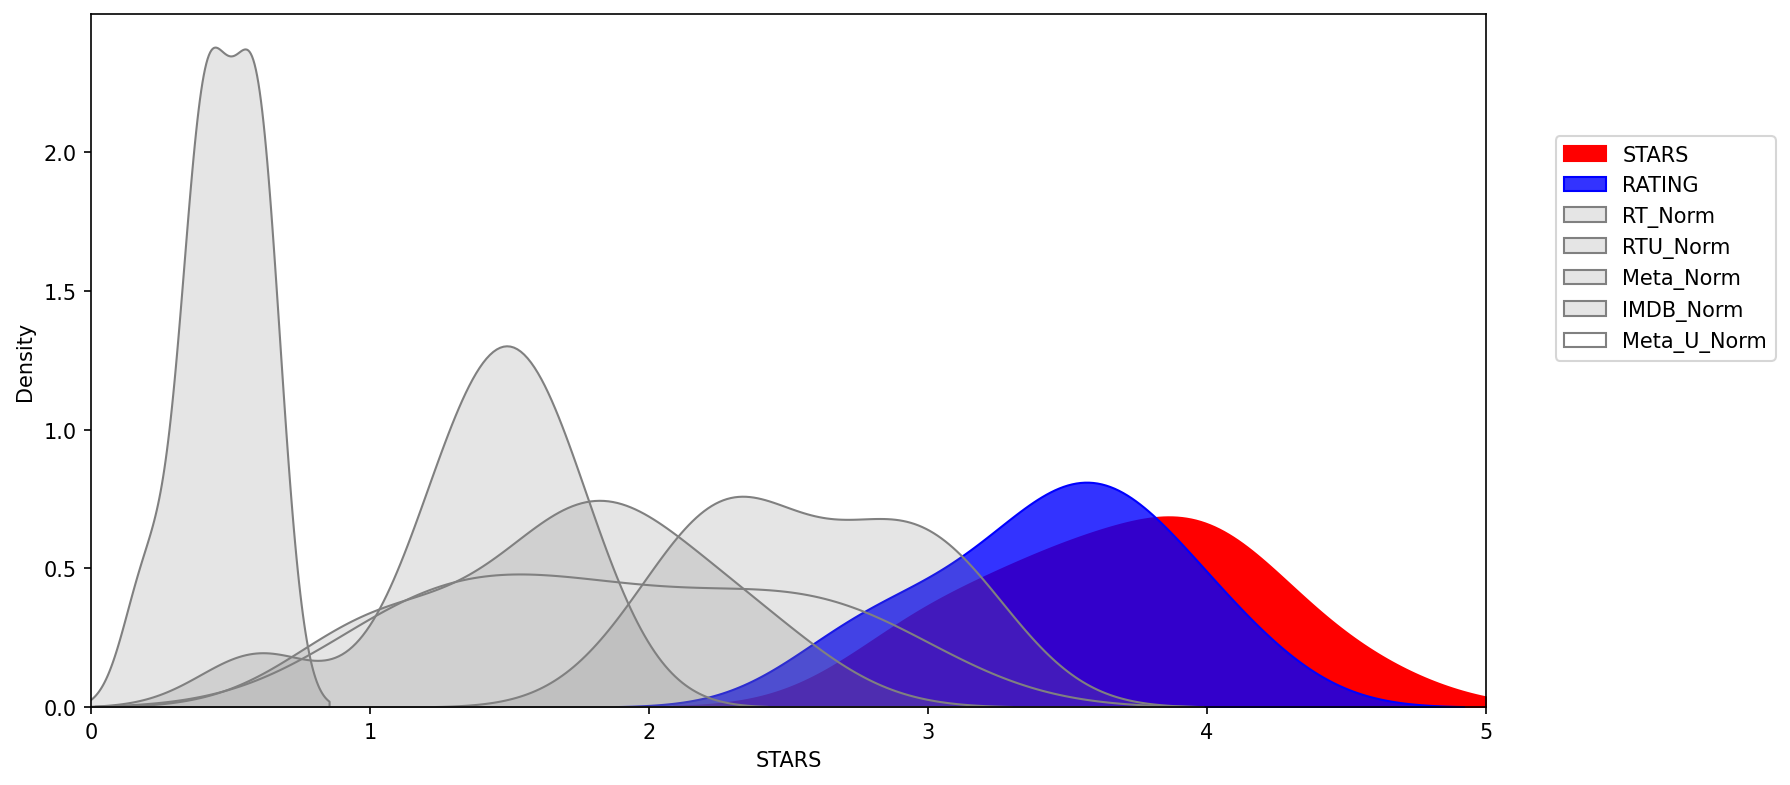

In [59]:
plt.subplots(figsize=(12,6),dpi=150)
for i in range(len(a3)):
    sns.kdeplot(
    data = df4, x = a3[i],
    fill=True, color=b3[i],
    alpha=alf[i], linewidth=1, label = a3[i]
    )
plt.legend(loc=(1.05, 0.5))
plt.xlim((0,5))
plt.show()

---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">
  
**Общие выводы: вот это да! Fandango показывал 3-4 звезды для фильмов, которые явно были неудачными!**  
    
**Больше всего отличается фильм [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0) - Fandango дал ему рейтинг 4.5 звёзд, хотя этот фильм получил [средний рейтинг 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) от других компаний!**

In [60]:
# Найдем строку с фильмом Taken_3
taken_3 = norm_scores_2.iloc[25]
taken_3

FILM           Taken 3 (2015)
STARS                     4.5
RATING                    4.1
RT_Norm                   0.4
RTU_Norm                  2.3
Meta_Norm                 1.3
Meta_U_Norm               2.3
IMDB_Norm                 3.0
Name: 25, dtype: object

In [61]:
# вычислим средний рейтинг Taken_3 от других компаний
taken_3[['RT_Norm',	'RTU_Norm',	'Meta_Norm',	'Meta_U_Norm',	'IMDB_Norm']].mean()

1.86

----
---


In [62]:
# Выгрузим файлы для создания дашборда в Datalens
fandango['FILM'] = fandango['FILM'].str.replace('"', '')
fandango['FILM'] = fandango['FILM'].str.replace(',', '')
fandango['FILM'] = fandango['FILM'].str.replace("'", '')
fandango.to_csv('fandango.csv', index = False)

In [63]:
# Выгрузим файлы для создания дашборда в Datalens
df3['FILM'] = df3['FILM'].str.replace('"', '')
df3['FILM'] = df3['FILM'].str.replace(',', '')
df3['FILM'] = df3['FILM'].str.replace("'", '')
df3.to_csv('fandango_com.csv', index = False)